# Kaggle - WiDS Datathon 2022

# 1. Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


# 2. Data

In [2]:
#paths to the Github repo

train_path = 'https://raw.githubusercontent.com/ccollado7/wds-datathon-2022/main/data/raw/train.csv'
test_path = 'https://raw.githubusercontent.com/ccollado7/wds-datathon-2022/main/data/raw/test.csv'

In [3]:
#train dataset

train = pd.read_csv(train_path)
train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [4]:
#shape of train dataset

train.shape

(75757, 64)

In [5]:
#columns

train.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

In [6]:
# data tyes - train

train.dtypes.value_counts()

int64      37
float64    24
object      3
dtype: int64

In [7]:
#test dataset

test = pd.read_csv(test_path)
test.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
0,7,State_1,Commercial,Grocery_store_or_food_market,28484.0,1994.0,37.0,2.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75757
1,7,State_1,Commercial,Grocery_store_or_food_market,21906.0,1961.0,55.0,45.7,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75758
2,7,State_1,Commercial,Grocery_store_or_food_market,16138.0,1950.0,1.0,59.1,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75759
3,7,State_1,Commercial,Grocery_store_or_food_market,97422.0,1971.0,34.0,35.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75760
4,7,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,35.0,1.8,38,50.596774,...,0,29,5,2,0,340.0,330.0,22.8,126.0,75761


In [8]:
#shape of test dataset

test.shape

(9705, 63)

In [9]:
# data tyes - test

test.dtypes.value_counts()

int64      37
float64    23
object      3
dtype: int64

# 3. Analysis - Train dataset

## 3.1 General EDA

In [11]:
#columns with null

null_count = train.isnull().sum()
null_count[null_count > 0]

year_built                    1837
energy_star_rating           26709
direction_max_wind_speed     41082
direction_peak_wind_speed    41811
max_wind_speed               41082
days_with_fog                45796
dtype: int64

### Year Factor

anonymized year in which the weather and energy usage factors were observed

Text(0.5, 1.0, 'Test')

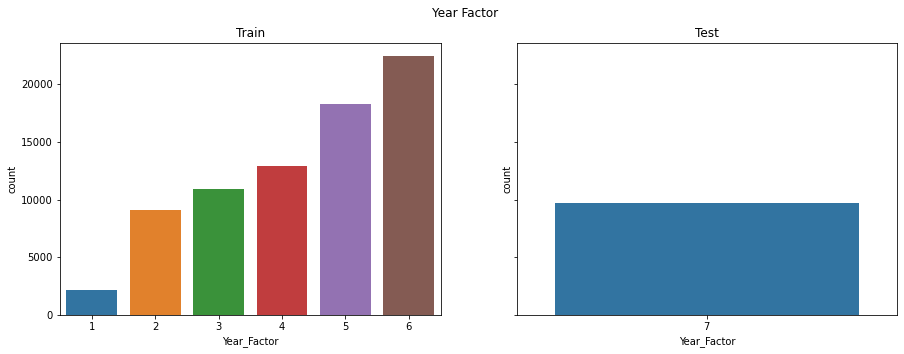

In [56]:
#count by year

fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Year Factor')


sns.countplot(ax=ax[0],x="Year_Factor",data=train)
ax[0].set_title('Train')

sns.countplot(ax=ax[1],x="Year_Factor",data=test)
ax[1].set_title('Test')

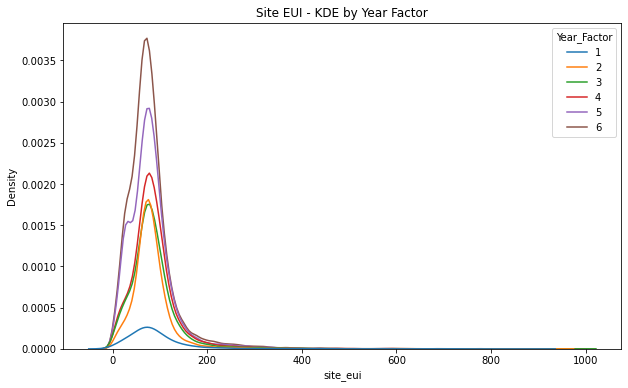

In [66]:
#Site EUI - KDE by Year Factor

fig = plt.figure(figsize=(10,6))
sns.kdeplot(x="site_eui",data=train,hue='Year_Factor',palette="tab10")
plt.title('Site EUI - KDE by Year Factor')
plt.show()

<AxesSubplot:xlabel='Year_Factor', ylabel='site_eui'>

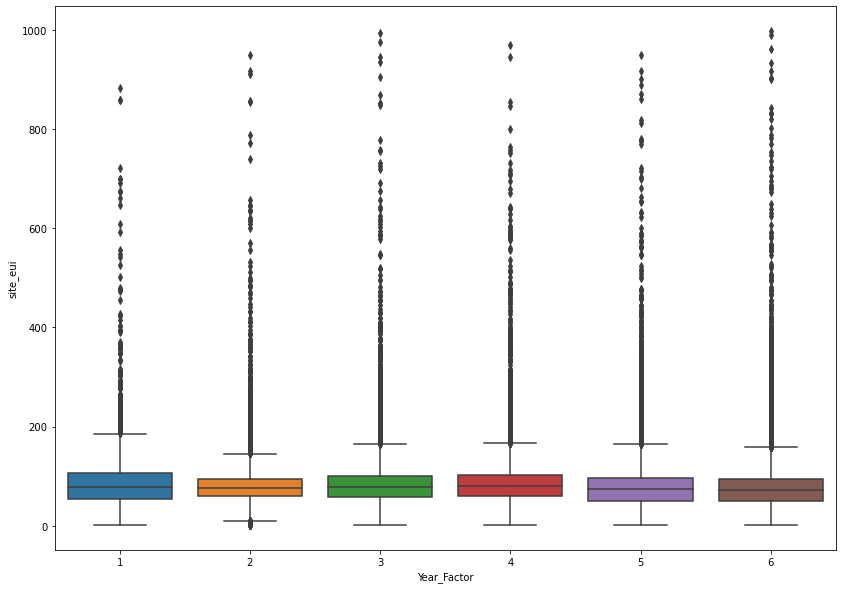

In [178]:
#Site EUI - Boxplot by Year Factor

fig = plt.figure(figsize=(14,10))
sns.boxplot(x="Year_Factor", y="site_eui", data=train)

### State Factor

anonymized state in which the building is located

Text(0.5, 1.0, 'Test')

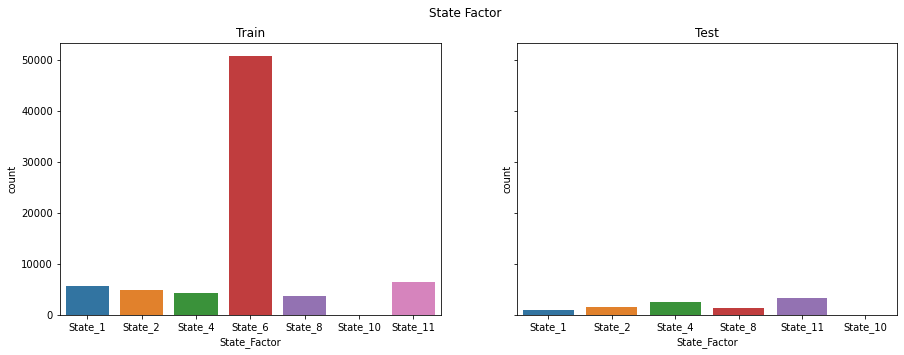

In [63]:
#count by state factor

fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('State Factor')


sns.countplot(ax=ax[0],x="State_Factor",data=train)
ax[0].set_title('Train')

sns.countplot(ax=ax[1],x="State_Factor",data=test)
ax[1].set_title('Test')

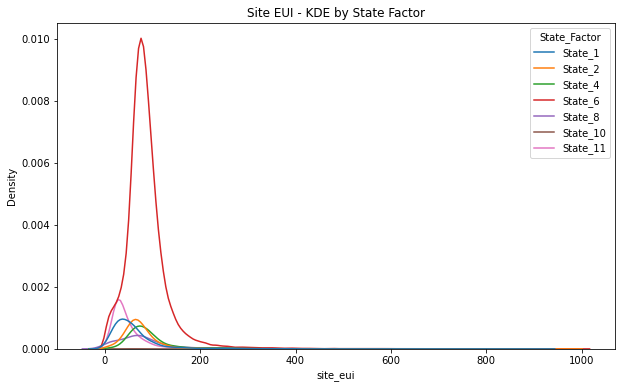

In [73]:
#Site EUI - KDE by State Factor

fig = plt.figure(figsize=(10,6))
sns.kdeplot(x="site_eui",data=train,hue='State_Factor',palette="tab10")
plt.title('Site EUI - KDE by State Factor')
plt.show()

<AxesSubplot:xlabel='State_Factor', ylabel='site_eui'>

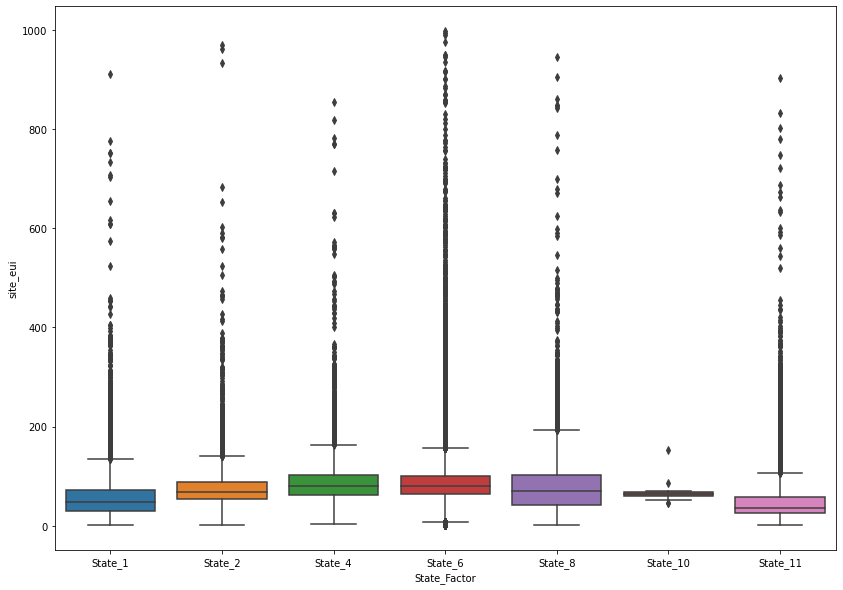

In [177]:
#Site EUI - Boxplot by State Factor

fig = plt.figure(figsize=(14,10))
sns.boxplot(x="State_Factor", y="site_eui", data=train)

### Building Class

building classification

Text(0.5, 1.0, 'Test')

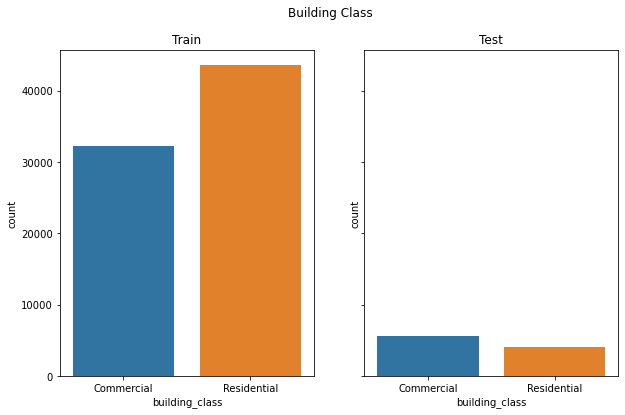

In [74]:
#count by building classification

fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
fig.suptitle('Building Class')


sns.countplot(ax=ax[0],x="building_class",data=train)
ax[0].set_title('Train')

sns.countplot(ax=ax[1],x="building_class",data=test)
ax[1].set_title('Test')

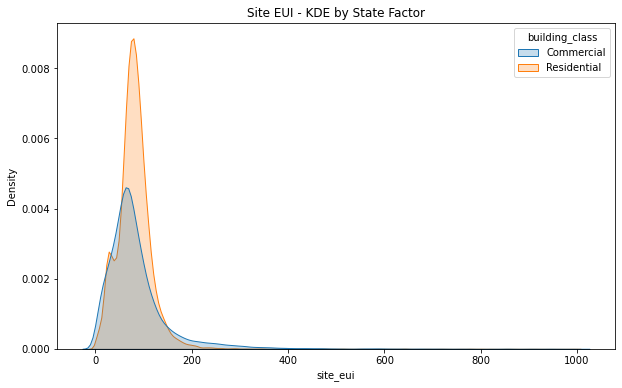

In [154]:
#Site EUI - KDE by building classification

fig = plt.figure(figsize=(10,6))
sns.kdeplot(x="site_eui",data=train,hue='building_class',palette="tab10",fill=True)
plt.title('Site EUI - KDE by State Factor')
plt.show()

<AxesSubplot:xlabel='building_class', ylabel='site_eui'>

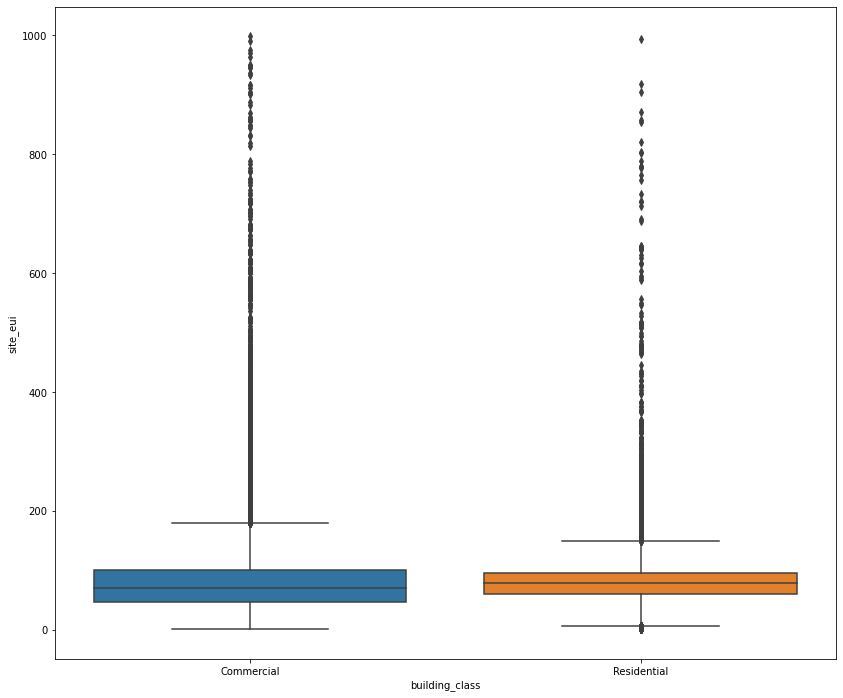

In [176]:
#Site EUI - Boxplot by building classification

fig = plt.figure(figsize=(14,12))
sns.boxplot(x="building_class", y="site_eui", data=train)

### Facility Type

building usage type

In [82]:
train['facility_type'].unique()

array(['Grocery_store_or_food_market',
       'Warehouse_Distribution_or_Shipping_center',
       'Retail_Enclosed_mall', 'Education_Other_classroom',
       'Warehouse_Nonrefrigerated', 'Warehouse_Selfstorage',
       'Office_Uncategorized', 'Data_Center', 'Commercial_Other',
       'Mixed_Use_Predominantly_Commercial',
       'Office_Medical_non_diagnostic', 'Education_College_or_university',
       'Industrial', 'Laboratory',
       'Public_Assembly_Entertainment_culture',
       'Retail_Vehicle_dealership_showroom', 'Retail_Uncategorized',
       'Lodging_Hotel', 'Retail_Strip_shopping_mall',
       'Education_Uncategorized', 'Health_Care_Inpatient',
       'Public_Assembly_Drama_theater', 'Public_Assembly_Social_meeting',
       'Religious_worship', 'Mixed_Use_Commercial_and_Residential',
       'Office_Bank_or_other_financial', 'Parking_Garage',
       'Commercial_Unknown', 'Service_Vehicle_service_repair_shop',
       'Service_Drycleaning_or_Laundry', 'Public_Assembly_Recreation

Text(0.5, 1.0, 'Train')

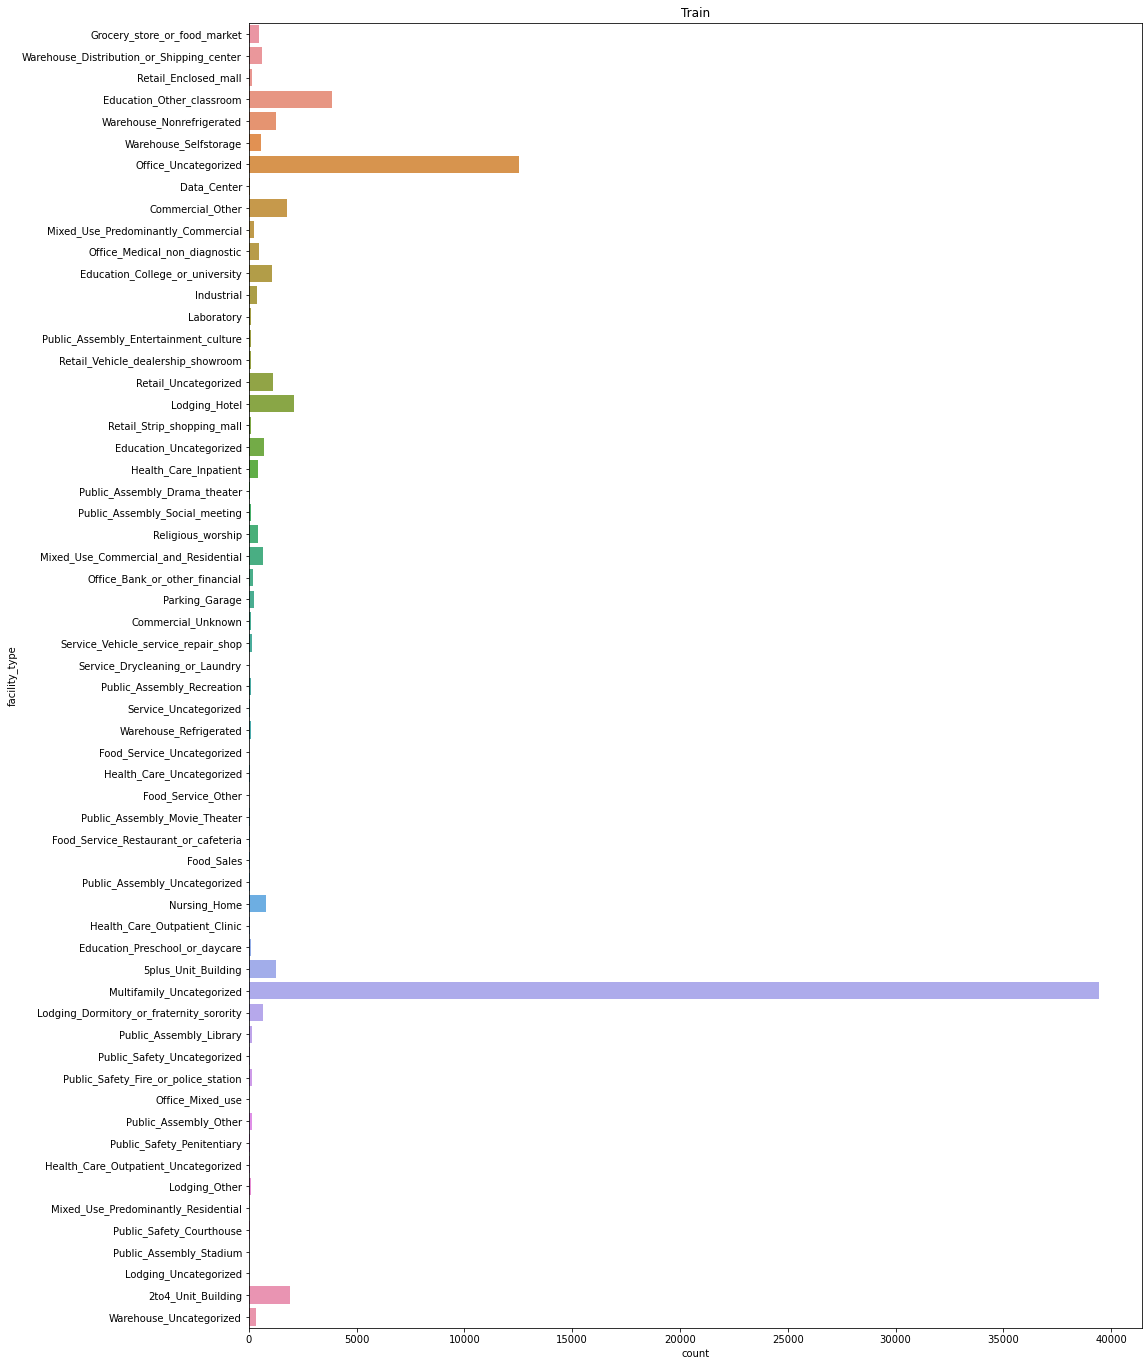

In [91]:
plt.figure(figsize=(16,24))
sns.countplot(y="facility_type",data=train)
plt.title('Train')

Text(0.5, 1.0, 'Test')

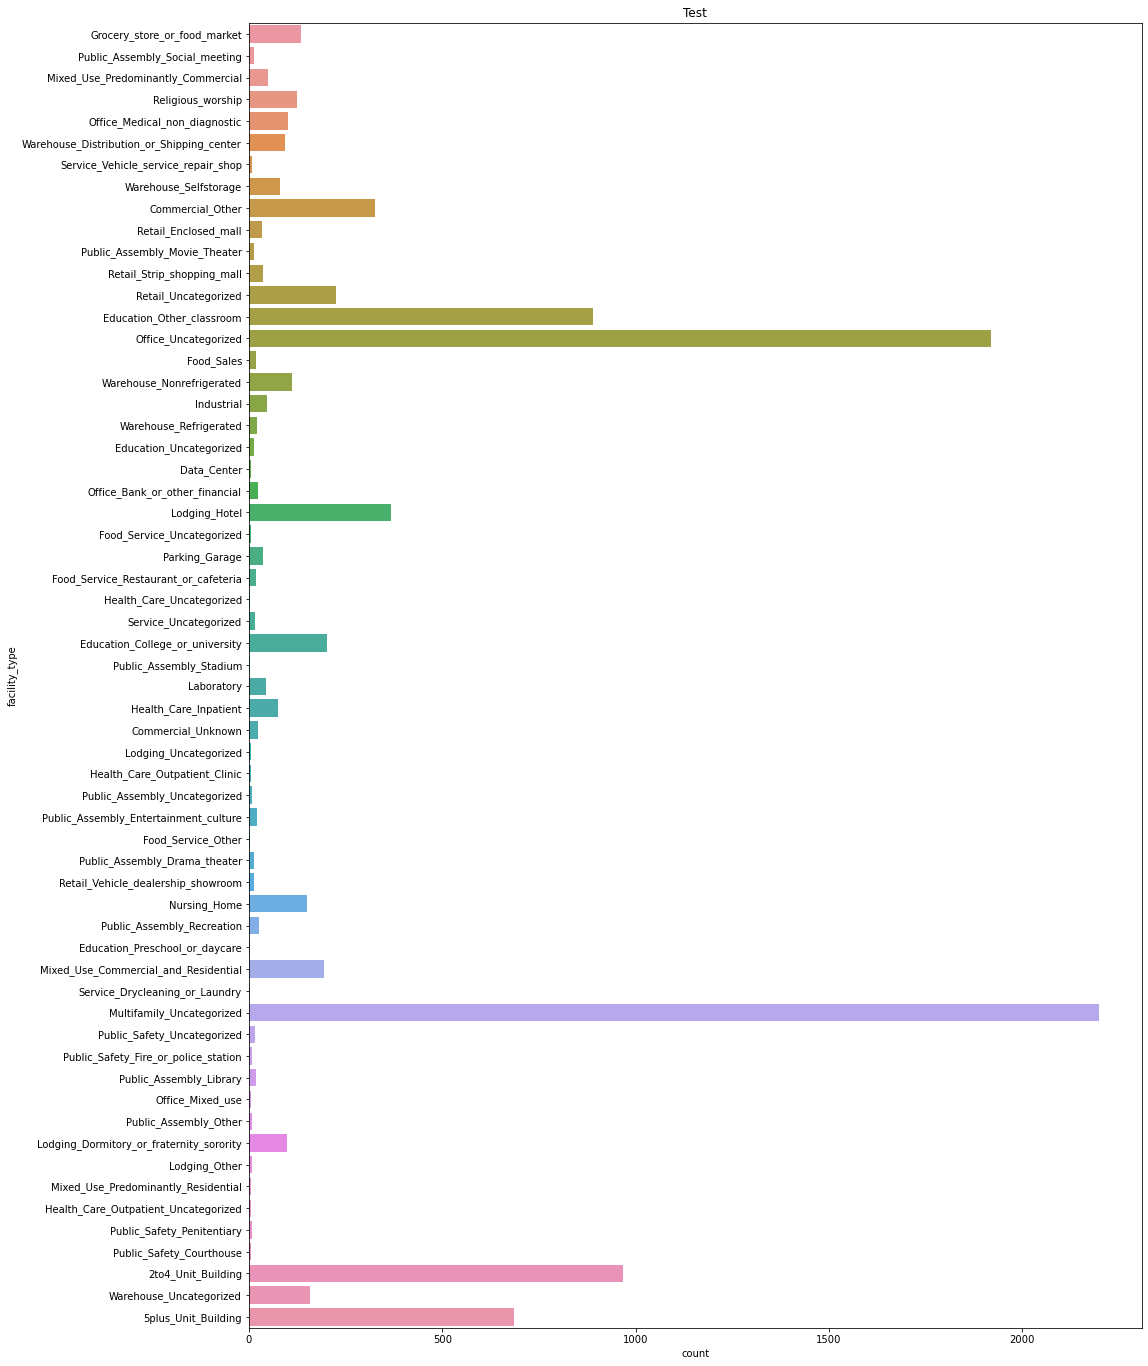

In [93]:
plt.figure(figsize=(16,24))
sns.countplot(y="facility_type",data=test)
plt.title('Test')

### Floor Area

floor area (in square feet) of the building

In [54]:
#statistics

train['floor_area'].describe()

count    7.575700e+04
mean     1.659839e+05
std      2.468758e+05
min      9.430000e+02
25%      6.237900e+04
50%      9.136700e+04
75%      1.660000e+05
max      6.385382e+06
Name: floor_area, dtype: float64

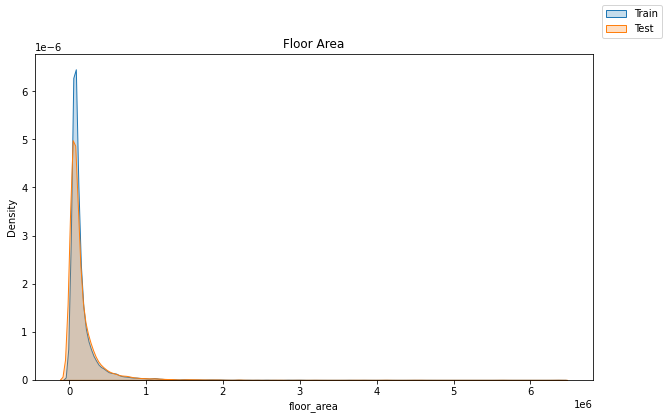

In [155]:
#kde plot

fig = plt.figure(figsize=(10,6))
sns.kdeplot(x="floor_area",data=train,fill=True)
sns.kdeplot(x="floor_area",data=test,fill=True)
fig.legend(labels=['Train','Test'])
plt.title('Floor Area')
plt.show()

Text(0.5, 1.0, ' Floor Area vs site EUI')

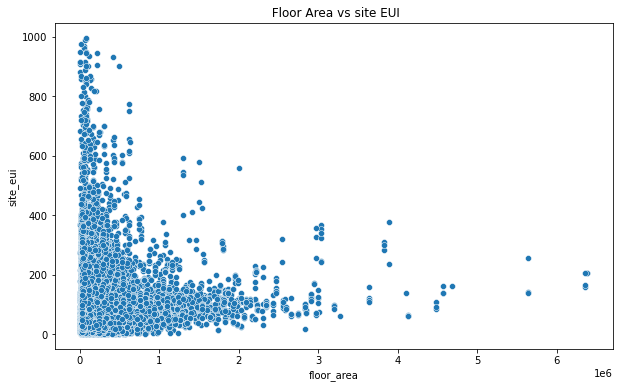

In [112]:
#scatter plot

fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=train, x="floor_area", y="site_eui")
plt.title(' Floor Area vs site EUI')

### Year Built

year in which the building was constructed

In [98]:
#statistics

train['year_built'].describe()

count    73920.000000
mean      1952.306764
std         37.053619
min          0.000000
25%       1927.000000
50%       1951.000000
75%       1977.000000
max       2015.000000
Name: year_built, dtype: float64

In [103]:
#rows with year_built cero value - train

year_built_train_sub = train[train['year_built'] == 0]
year_built_train_sub

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
353,1,State_1,Commercial,Lodging_Hotel,204392.0,0.0,61.0,59.1,36,50.500000,...,14,0,0,0,NaN,NaN,NaN,NaN,82.627179,353
955,2,State_1,Commercial,Lodging_Hotel,204392.0,0.0,63.0,2.4,27,48.951613,...,113,35,1,0,1.0,1.0,1.0,88.0,87.526794,955
2159,3,State_1,Commercial,Lodging_Hotel,204392.0,0.0,63.0,9.1,22,44.790323,...,72,10,0,0,NaN,NaN,NaN,NaN,75.362740,2159
3415,4,State_1,Commercial,Lodging_Hotel,204392.0,0.0,68.0,9.1,41,55.096774,...,27,6,0,0,NaN,NaN,NaN,NaN,61.793699,3415
4535,5,State_1,Commercial,Lodging_Hotel,204392.0,0.0,76.0,9.1,29,51.387097,...,136,52,10,0,NaN,NaN,NaN,NaN,59.503653,4535
5571,6,State_1,Commercial,Lodging_Hotel,204392.0,0.0,78.0,45.7,37,52.693548,...,16,2,0,0,NaN,NaN,NaN,NaN,60.833333,5571


In [104]:
#rows with year_built cero value - test

year_built_test_sub = test[test['year_built'] == 0]
year_built_test_sub

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
7050,7,State_1,Commercial,Lodging_Hotel,204392.0,0.0,78.0,18.6,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,82807


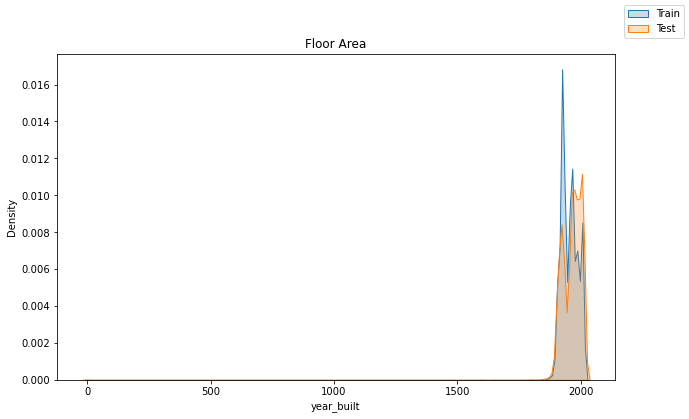

In [156]:
fig = plt.figure(figsize=(10,6))
sns.kdeplot(x="year_built",data=train,fill=True)
sns.kdeplot(x="year_built",data=test,fill=True)
fig.legend(labels=['Train','Test'])
plt.title('Floor Area')
plt.show()

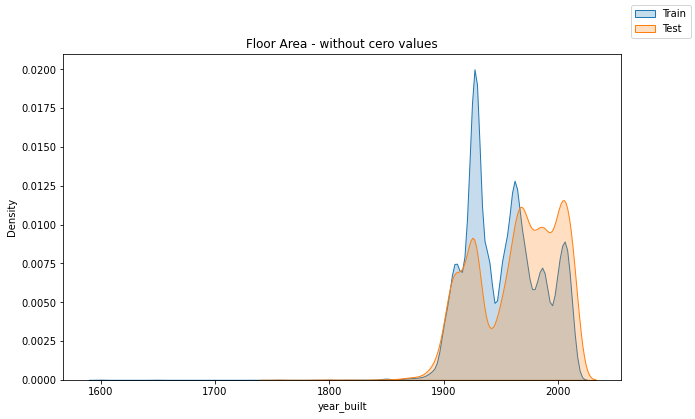

In [157]:
fig = plt.figure(figsize=(10,6))
sns.kdeplot(x="year_built",data=train[train['year_built'] != 0],fill=True)
sns.kdeplot(x="year_built",data=test[test['year_built'] != 0],fill=True)
fig.legend(labels=['Train','Test'])
plt.title('Floor Area - without cero values')
plt.show()

Text(0.5, 1.0, 'Test')

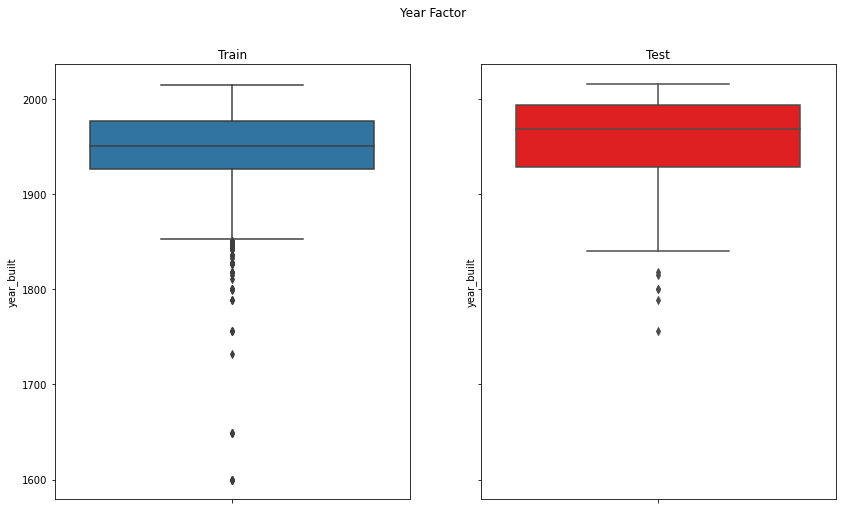

In [174]:
fig, ax = plt.subplots(1, 2, figsize=(14, 8), sharey=True)
fig.suptitle('Year Factor')


sns.boxplot(ax=ax[0],y="year_built",data=train[train['year_built'] != 0])
ax[0].set_title('Train')

sns.boxplot(ax=ax[1],y="year_built",data=test[test['year_built'] != 0],color='red')
ax[1].set_title('Test')

Text(0.5, 1.0, ' Year Built vs site EUI')

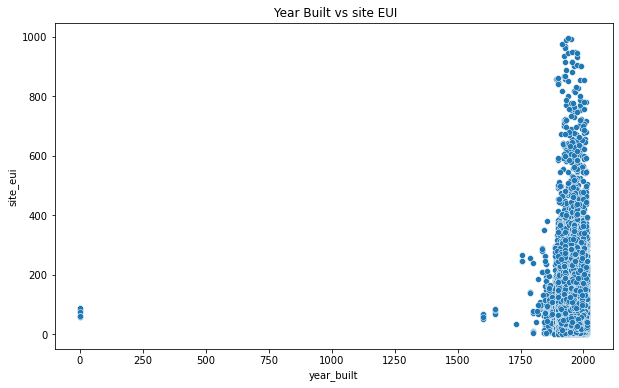

In [113]:
#scatter plot

fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=train, x="year_built", y="site_eui")
plt.title(' Year Built vs site EUI')

Text(0.5, 1.0, ' Year Built vs site EUI')

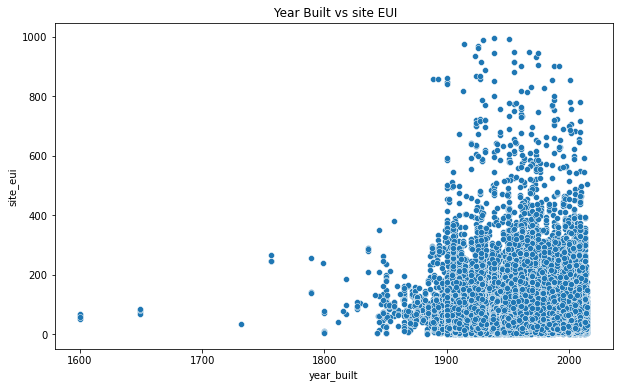

In [114]:
#scatter plot - without cero values

fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=train[train['year_built'] != 0], x="year_built", y="site_eui")
plt.title(' Year Built vs site EUI')

### Energy Star Rating

the energy star rating of the building

In [109]:
#statistics

train['energy_star_rating'].describe()

count    49048.000000
mean        61.048605
std         28.663683
min          0.000000
25%         40.000000
50%         67.000000
75%         85.000000
max        100.000000
Name: energy_star_rating, dtype: float64

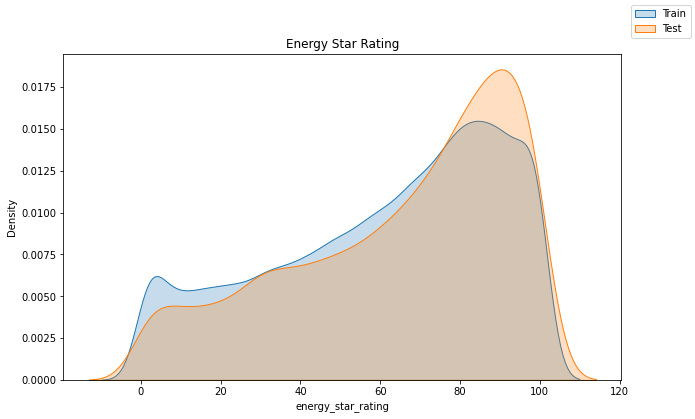

In [158]:
fig = plt.figure(figsize=(10,6))
sns.kdeplot(x="energy_star_rating",data=train,fill=True)
sns.kdeplot(x="energy_star_rating",data=test,fill=True)
fig.legend(labels=['Train','Test'])
plt.title('Energy Star Rating')
plt.show()

Text(0.5, 1.0, 'Test')

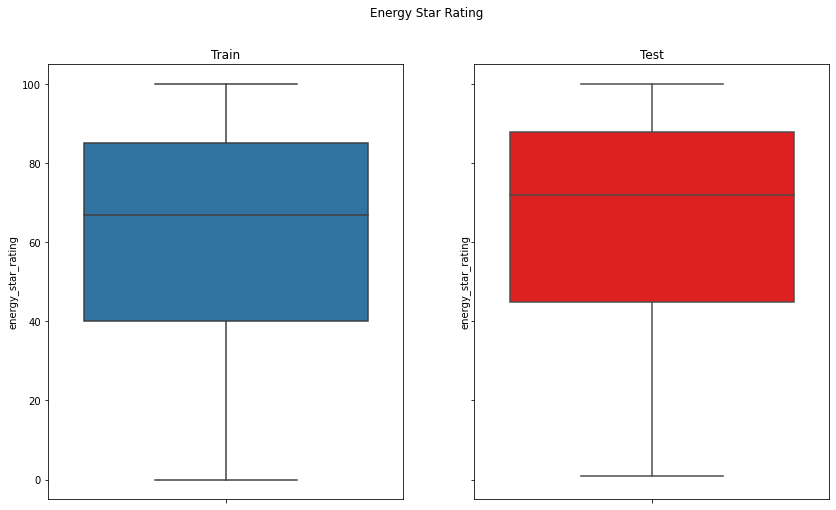

In [173]:
fig, ax = plt.subplots(1, 2, figsize=(14, 8), sharey=True)
fig.suptitle('Energy Star Rating')


sns.boxplot(ax=ax[0],y="energy_star_rating",data=train)
ax[0].set_title('Train')

sns.boxplot(ax=ax[1],y="energy_star_rating",data=test,color='red')
ax[1].set_title('Test')

Text(0.5, 1.0, ' Energy Star Rating vs site EUI')

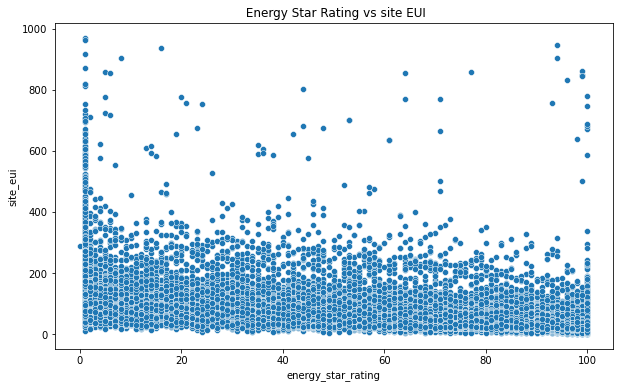

In [116]:
#scatter plot

fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=train, x="energy_star_rating", y="site_eui")
plt.title(' Energy Star Rating vs site EUI')

### Elevation

the energy star rating of the building

In [119]:
#statistics

train['ELEVATION'].describe()

count    75757.000000
mean        39.506323
std         60.656596
min         -6.400000
25%         11.900000
50%         25.000000
75%         42.700000
max       1924.500000
Name: ELEVATION, dtype: float64

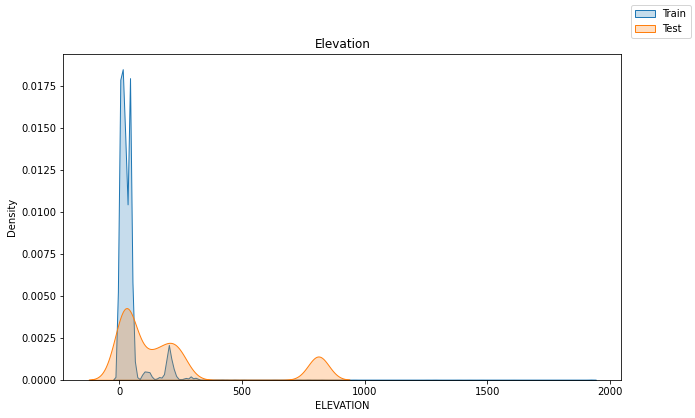

In [159]:
fig = plt.figure(figsize=(10,6))
sns.kdeplot(x="ELEVATION",data=train,fill=True)
sns.kdeplot(x="ELEVATION",data=test,fill=True)
fig.legend(labels=['Train','Test'])
plt.title('Elevation')
plt.show()

Text(0.5, 1.0, 'Test')

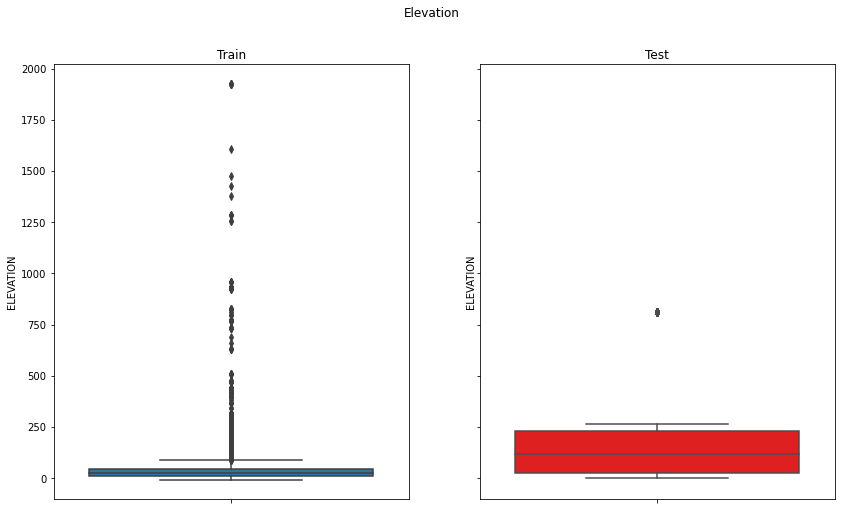

In [172]:
fig, ax = plt.subplots(1, 2, figsize=(14, 8), sharey=True)
fig.suptitle('Elevation')


sns.boxplot(ax=ax[0],y="ELEVATION",data=train)
ax[0].set_title('Train')

sns.boxplot(ax=ax[1],y="ELEVATION",data=test,color='red')
ax[1].set_title('Test')

Text(0.5, 1.0, ' Elevation vs site EUI')

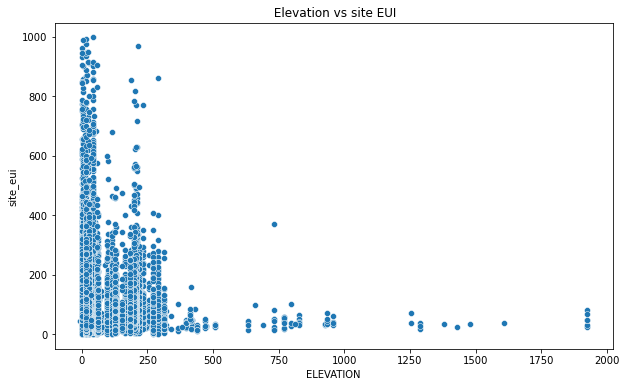

In [137]:
#scatter plot

fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=train, x="ELEVATION", y="site_eui")
plt.title(' Elevation vs site EUI')

### January minimun temperature

minimun temperature in January (in Fahrenheit) at the location of the building

In [138]:
#statistics

train['january_min_temp'].describe()

count    75757.000000
mean        11.432343
std          9.381027
min        -19.000000
25%          6.000000
50%         11.000000
75%         13.000000
max         49.000000
Name: january_min_temp, dtype: float64

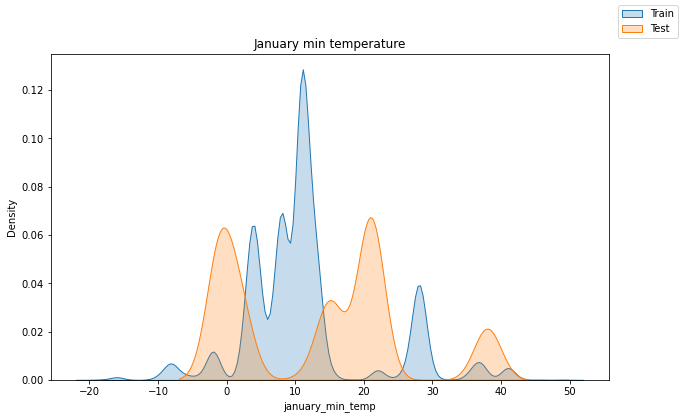

In [160]:
fig = plt.figure(figsize=(10,6))
sns.kdeplot(x="january_min_temp",data=train,fill=True)
sns.kdeplot(x="january_min_temp",data=test,fill=True)
fig.legend(labels=['Train','Test'])
plt.title('January min temperature')
plt.show()

Text(0.5, 1.0, 'Test')

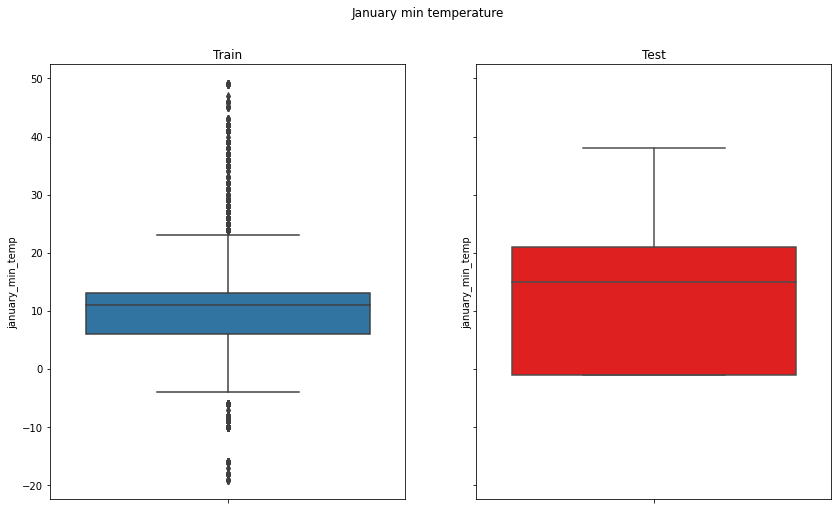

In [171]:
fig, ax = plt.subplots(1, 2, figsize=(14, 8), sharey=True)
fig.suptitle('January min temperature')


sns.boxplot(ax=ax[0],y="january_min_temp",data=train)
ax[0].set_title('Train')

sns.boxplot(ax=ax[1],y="january_min_temp",data=test,color='red')
ax[1].set_title('Test')

Text(0.5, 1.0, 'January min temperature vs site EUI')

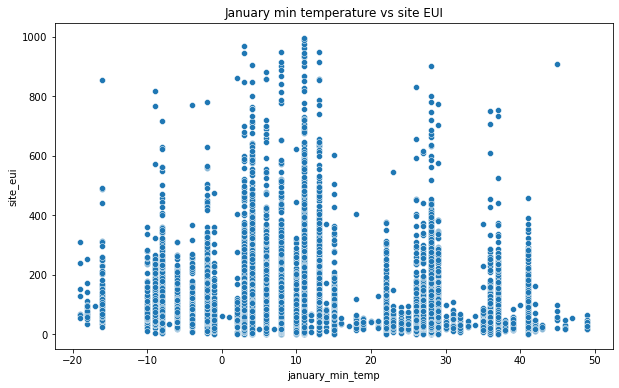

In [141]:
#scatter plot

fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=train, x="january_min_temp", y="site_eui")
plt.title('January min temperature vs site EUI')

### January average temperature

average temperature in January (in Fahrenheit) at the location of the building

In [138]:
#statistics

train['january_avg_temp'].describe()

count    75757.000000
mean        11.432343
std          9.381027
min        -19.000000
25%          6.000000
50%         11.000000
75%         13.000000
max         49.000000
Name: january_min_temp, dtype: float64

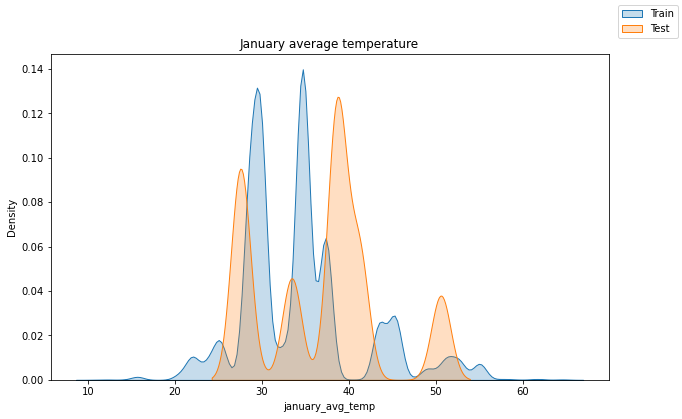

In [161]:
fig = plt.figure(figsize=(10,6))
sns.kdeplot(x="january_avg_temp",data=train,fill=True)
sns.kdeplot(x="january_avg_temp",data=test,fill=True)
fig.legend(labels=['Train','Test'])
plt.title('January average temperature')
plt.show()

Text(0.5, 1.0, 'Test')

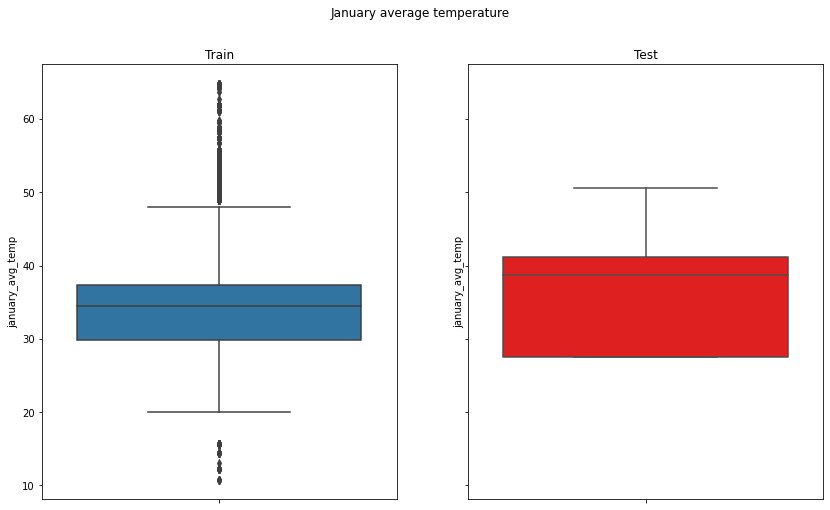

In [170]:
fig, ax = plt.subplots(1, 2, figsize=(14, 8), sharey=True)
fig.suptitle('January average temperature')


sns.boxplot(ax=ax[0],y="january_avg_temp",data=train)
ax[0].set_title('Train')

sns.boxplot(ax=ax[1],y="january_avg_temp",data=test,color='red')
ax[1].set_title('Test')

Text(0.5, 1.0, 'January average temperature vs site EUI')

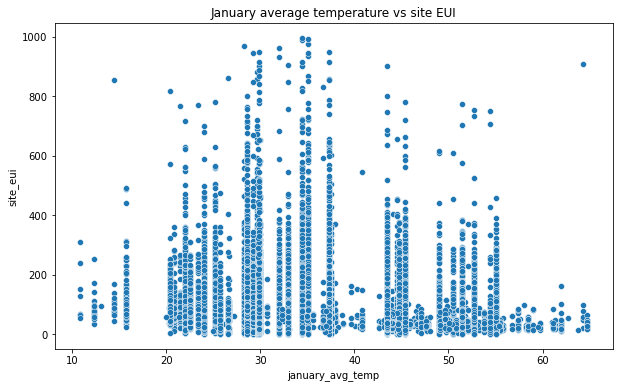

In [144]:
#scatter plot

fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=train, x="january_avg_temp", y="site_eui")
plt.title('January average temperature vs site EUI')

### January maximun temperature

maximum temperature in January (in Fahrenheit) at the location of the building

In [145]:
#statistics

train['january_max_temp'].describe()

count    75757.000000
mean        59.054952
std          5.355458
min         42.000000
25%         56.000000
50%         59.000000
75%         62.000000
max         91.000000
Name: january_max_temp, dtype: float64

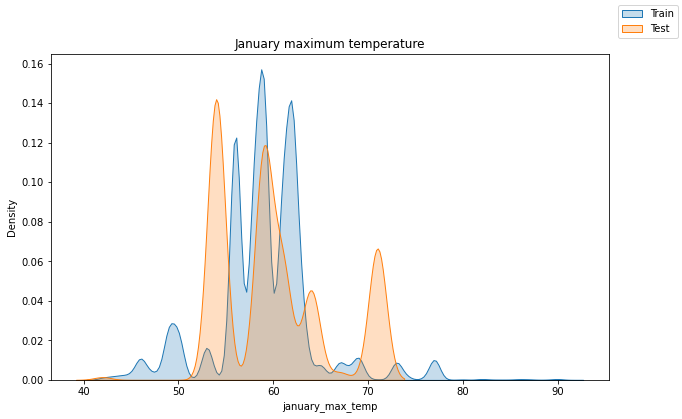

In [153]:
fig = plt.figure(figsize=(10,6))
sns.kdeplot(x="january_max_temp",data=train,fill=True)
sns.kdeplot(x="january_max_temp",data=test,fill=True)
fig.legend(labels=['Train','Test'])
plt.title('January maximum temperature')
plt.show()

Text(0.5, 1.0, 'Test')

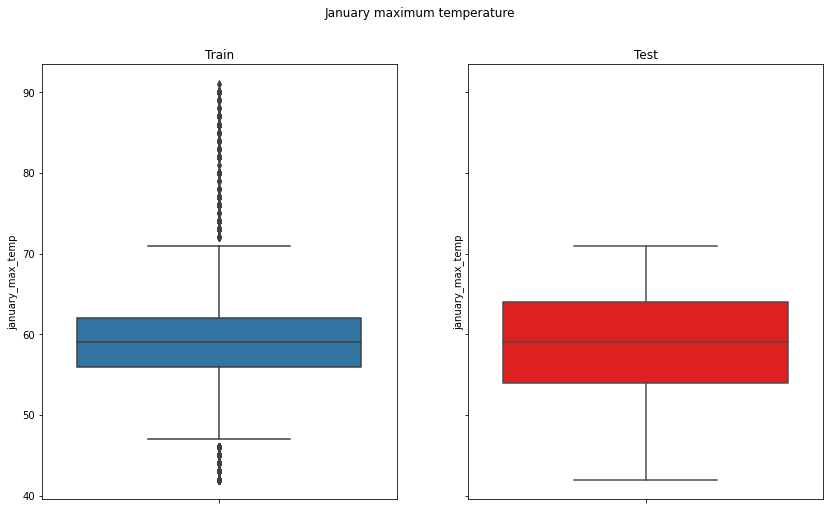

In [169]:
fig, ax = plt.subplots(1, 2, figsize=(14, 8), sharey=True)
fig.suptitle('January maximum temperature')


sns.boxplot(ax=ax[0],y="january_max_temp",data=train)
ax[0].set_title('Train')

sns.boxplot(ax=ax[1],y="january_max_temp",data=test,color='red')
ax[1].set_title('Test')

Text(0.5, 1.0, 'January maximum temperature vs site EUI')

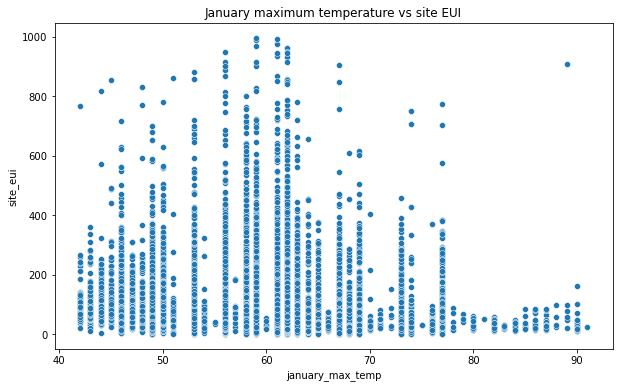

In [163]:
#scatter plot

fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=train, x="january_max_temp", y="site_eui")
plt.title('January maximum temperature vs site EUI')

### Cooling degree days

cooling degree day for a given day is the number of degrees where the daily average temperature exceeds 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.

In [164]:
#statistics

train['cooling_degree_days'].describe()

count    75757.000000
mean      1202.250446
std        391.561780
min          0.000000
25%       1128.000000
50%       1277.000000
75%       1489.000000
max       4948.000000
Name: cooling_degree_days, dtype: float64

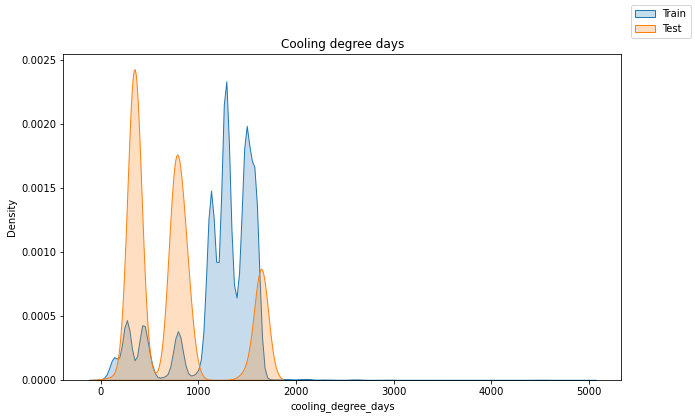

In [165]:
fig = plt.figure(figsize=(10,6))
sns.kdeplot(x="cooling_degree_days",data=train,fill=True)
sns.kdeplot(x="cooling_degree_days",data=test,fill=True)
fig.legend(labels=['Train','Test'])
plt.title('Cooling degree days')
plt.show()

Text(0.5, 1.0, 'Test')

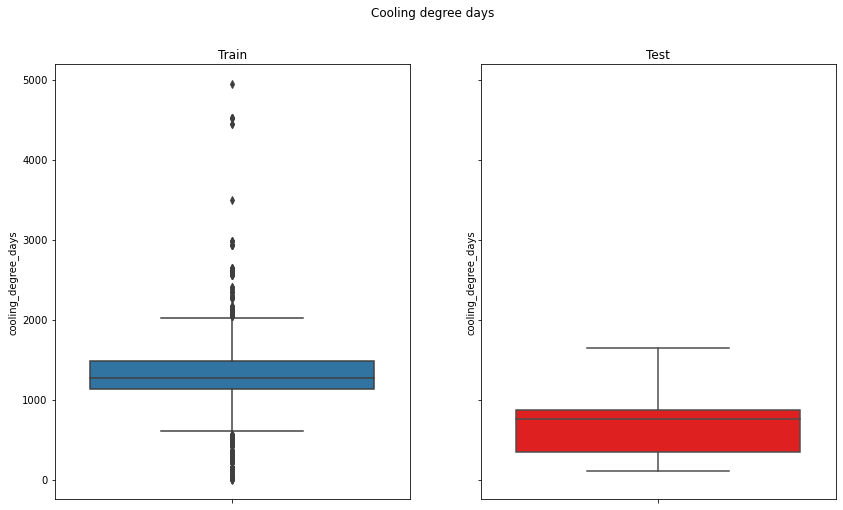

In [168]:
fig, ax = plt.subplots(1, 2, figsize=(14, 8), sharey=True)
fig.suptitle('Cooling degree days')


sns.boxplot(ax=ax[0],y="cooling_degree_days",data=train)
ax[0].set_title('Train')

sns.boxplot(ax=ax[1],y="cooling_degree_days",data=test,color='red')
ax[1].set_title('Test')

Text(0.5, 1.0, 'Cooling degree days vs site EUI')

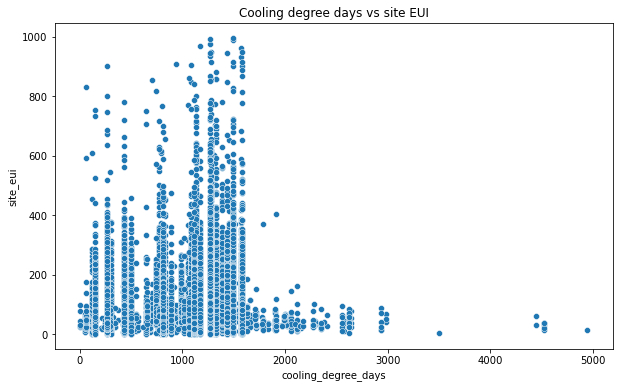

In [179]:
#scatter plot

fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=train, x="cooling_degree_days", y="site_eui")
plt.title('Cooling degree days vs site EUI')

### Heating degree days

heating degree day for a given day is the number of degrees where the daily average temperature falls under 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.

In [180]:
#statistics

train['heating_degree_days'].describe()

count    75757.000000
mean      4324.957390
std        824.366727
min        398.000000
25%       3978.000000
50%       4337.000000
75%       4670.000000
max       7929.000000
Name: heating_degree_days, dtype: float64

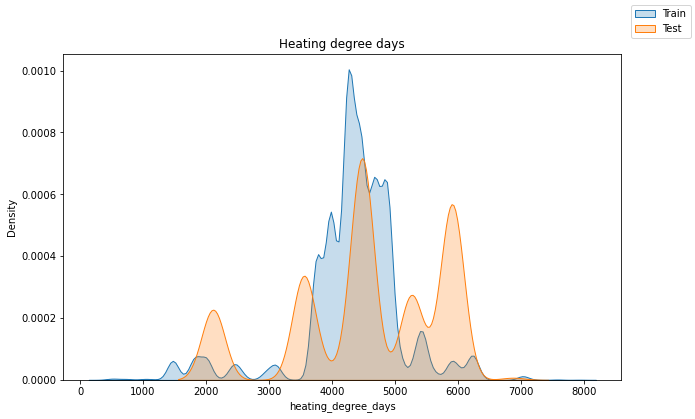

In [181]:
fig = plt.figure(figsize=(10,6))
sns.kdeplot(x="heating_degree_days",data=train,fill=True)
sns.kdeplot(x="heating_degree_days",data=test,fill=True)
fig.legend(labels=['Train','Test'])
plt.title('Heating degree days')
plt.show()

Text(0.5, 1.0, 'Test')

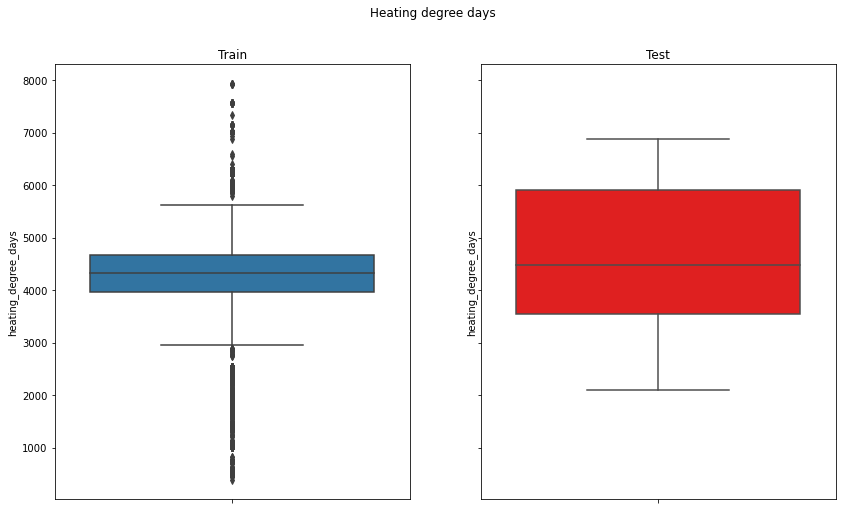

In [182]:
fig, ax = plt.subplots(1, 2, figsize=(14, 8), sharey=True)
fig.suptitle('Heating degree days')


sns.boxplot(ax=ax[0],y="heating_degree_days",data=train)
ax[0].set_title('Train')

sns.boxplot(ax=ax[1],y="heating_degree_days",data=test,color='red')
ax[1].set_title('Test')

Text(0.5, 1.0, 'Heating degree days vs site EUI')

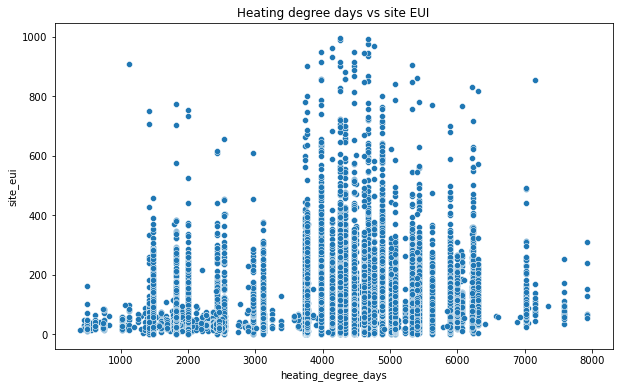

In [183]:
#scatter plot

fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=train, x="heating_degree_days", y="site_eui")
plt.title('Heating degree days vs site EUI')

### Precipitation inches

annual precipitation in inches at the location of the building

In [184]:
#statistics

train['precipitation_inches'].describe()

count    75757.000000
mean        42.430651
std         10.592205
min          0.000000
25%         39.350000
50%         42.170000
75%         46.320000
max        107.690000
Name: precipitation_inches, dtype: float64

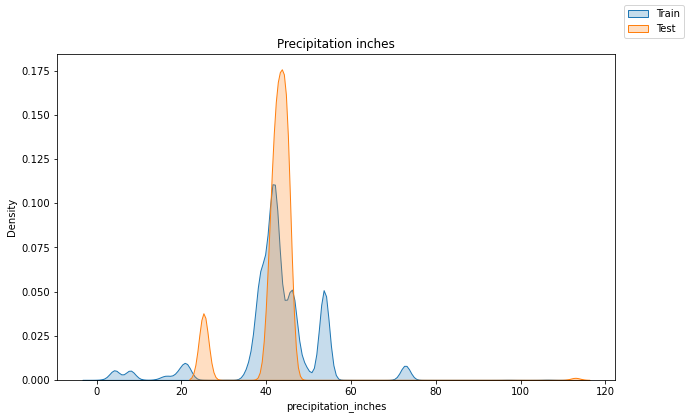

In [185]:
fig = plt.figure(figsize=(10,6))
sns.kdeplot(x="precipitation_inches",data=train,fill=True)
sns.kdeplot(x="precipitation_inches",data=test,fill=True)
fig.legend(labels=['Train','Test'])
plt.title('Precipitation inches')
plt.show()

Text(0.5, 1.0, 'Test')

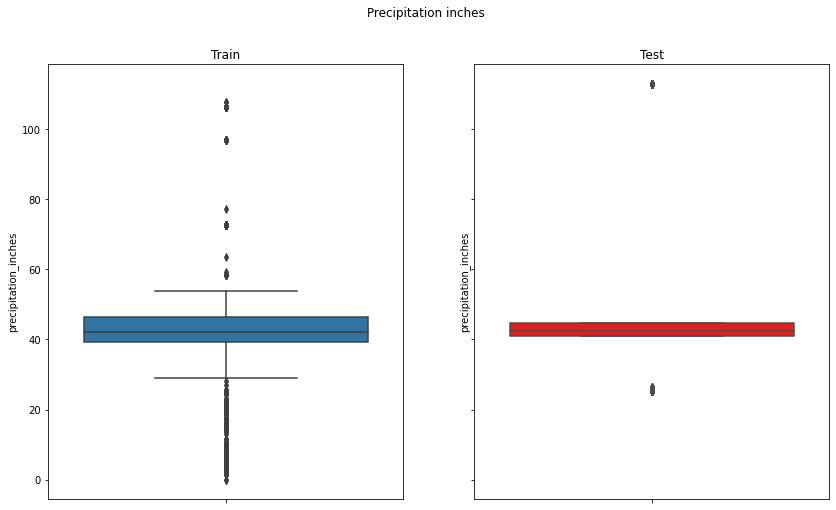

In [186]:
fig, ax = plt.subplots(1, 2, figsize=(14, 8), sharey=True)
fig.suptitle('Precipitation inches')


sns.boxplot(ax=ax[0],y="precipitation_inches",data=train)
ax[0].set_title('Train')

sns.boxplot(ax=ax[1],y="precipitation_inches",data=test,color='red')
ax[1].set_title('Test')

Text(0.5, 1.0, 'Precipitation inches vs site EUI')

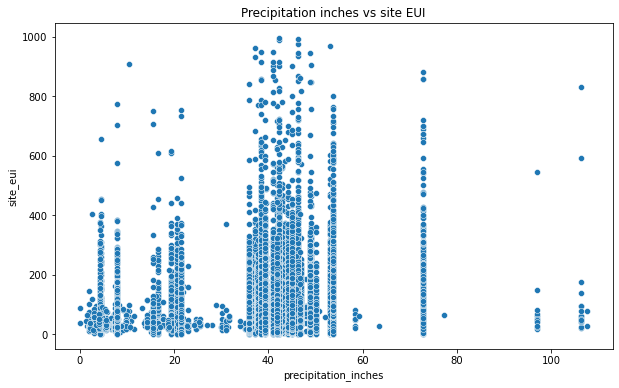

In [187]:
#scatter plot

fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=train, x="precipitation_inches", y="site_eui")
plt.title('Precipitation inches vs site EUI')

### Snowfall inches

annual snowfall in inches at the location of the building

In [188]:
#statistics

train['snowfall_inches'].describe()

count    75757.000000
mean        29.136379
std         17.810894
min          0.000000
25%          9.600000
50%         31.600000
75%         49.100000
max        127.300000
Name: snowfall_inches, dtype: float64

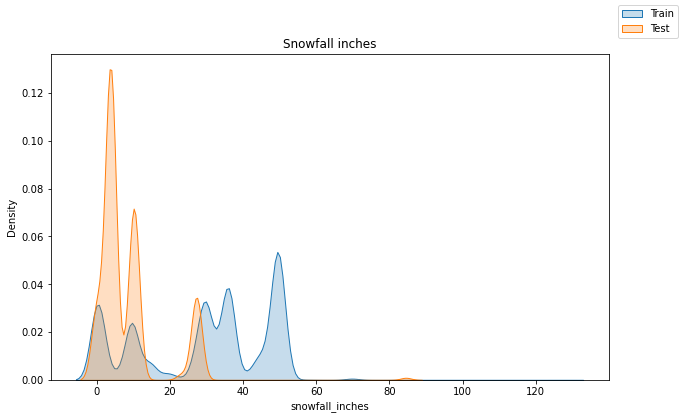

In [189]:
fig = plt.figure(figsize=(10,6))
sns.kdeplot(x="snowfall_inches",data=train,fill=True)
sns.kdeplot(x="snowfall_inches",data=test,fill=True)
fig.legend(labels=['Train','Test'])
plt.title('Snowfall inches')
plt.show()

Text(0.5, 1.0, 'Test')

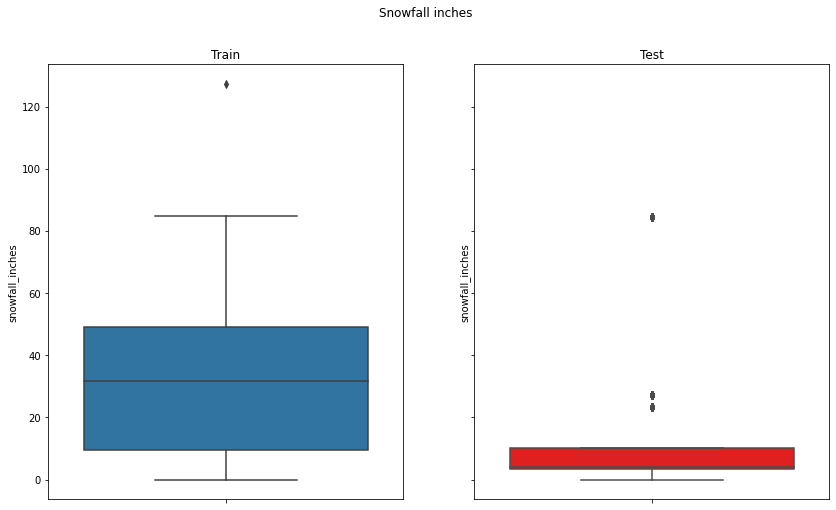

In [191]:
fig, ax = plt.subplots(1, 2, figsize=(14, 8), sharey=True)
fig.suptitle('Snowfall inches')


sns.boxplot(ax=ax[0],y="snowfall_inches",data=train)
ax[0].set_title('Train')

sns.boxplot(ax=ax[1],y="snowfall_inches",data=test,color='red')
ax[1].set_title('Test')

Text(0.5, 1.0, 'Snowfall inches vs site EUI')

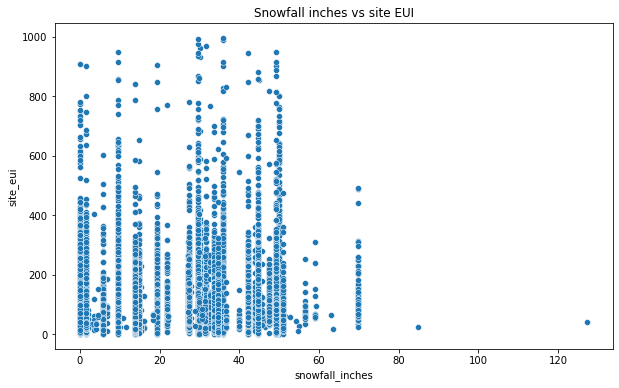

In [193]:
#scatter plot

fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=train, x="snowfall_inches", y="site_eui")
plt.title('Snowfall inches vs site EUI')

### Snowdepth inches

 annual snow depth in inches at the location of the building

In [194]:
#statistics

train['snowdepth_inches'].describe()

count    75757.000000
mean       164.862455
std        175.275869
min          0.000000
25%         10.000000
50%        101.000000
75%        377.000000
max       1292.000000
Name: snowdepth_inches, dtype: float64

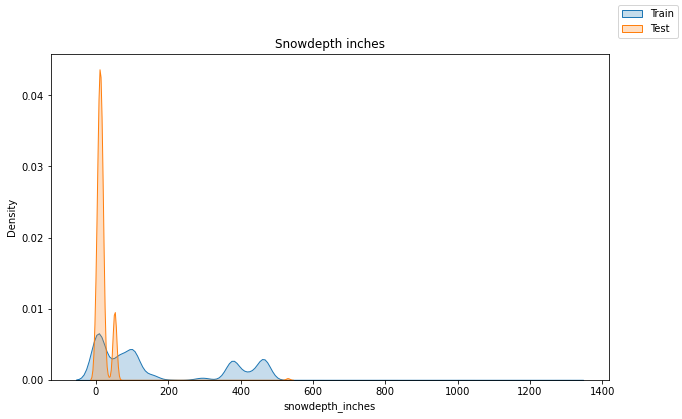

In [197]:
fig = plt.figure(figsize=(10,6))
sns.kdeplot(x="snowdepth_inches",data=train,fill=True)
sns.kdeplot(x="snowdepth_inches",data=test,fill=True)
fig.legend(labels=['Train','Test'])
plt.title('Snowdepth inches')
plt.show()

Text(0.5, 1.0, 'Test')

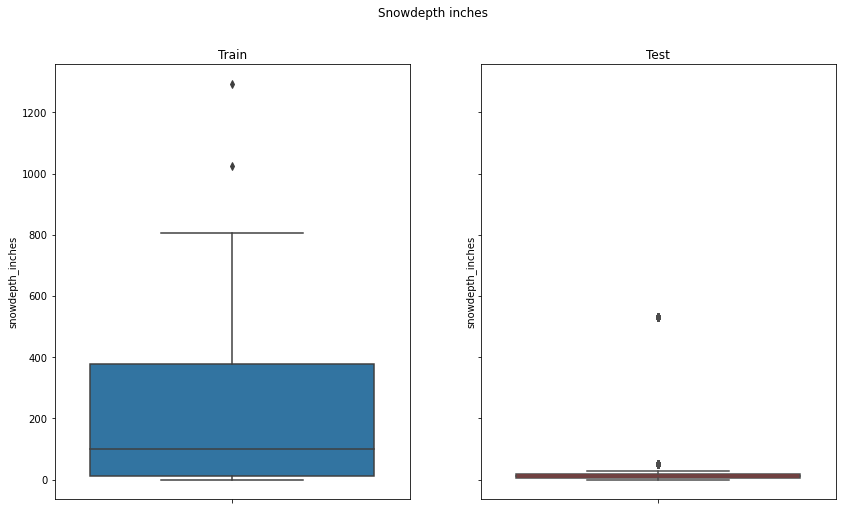

In [198]:
fig, ax = plt.subplots(1, 2, figsize=(14, 8), sharey=True)
fig.suptitle('Snowdepth inches')


sns.boxplot(ax=ax[0],y="snowdepth_inches",data=train)
ax[0].set_title('Train')

sns.boxplot(ax=ax[1],y="snowdepth_inches",data=test,color='red')
ax[1].set_title('Test')

Text(0.5, 1.0, 'Snowdepth inches vs site EUI')

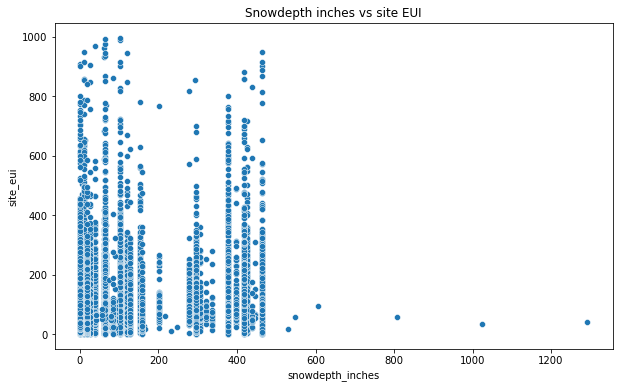

In [199]:
#scatter plot

fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=train, x="snowdepth_inches", y="site_eui")
plt.title('Snowdepth inches vs site EUI')

### Average Temperature

average temperature over a year at the location of the building

In [200]:
#statistics

train['avg_temp'].describe()

count    75757.000000
mean        56.176705
std          2.241940
min         44.512329
25%         55.147541
50%         56.835616
75%         57.215847
max         77.245205
Name: avg_temp, dtype: float64

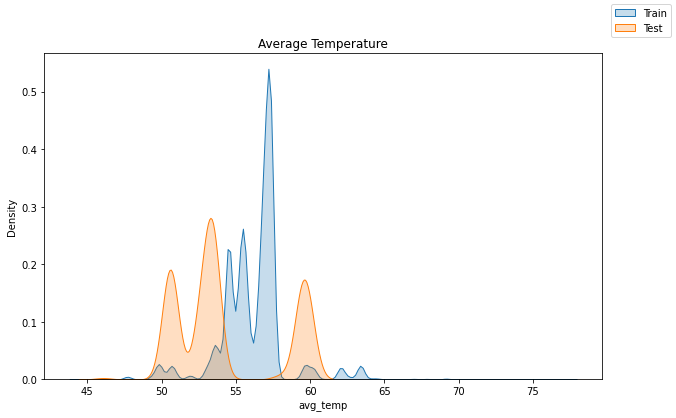

In [201]:
fig = plt.figure(figsize=(10,6))
sns.kdeplot(x="avg_temp",data=train,fill=True)
sns.kdeplot(x="avg_temp",data=test,fill=True)
fig.legend(labels=['Train','Test'])
plt.title('Average Temperature')
plt.show()

Text(0.5, 1.0, 'Test')

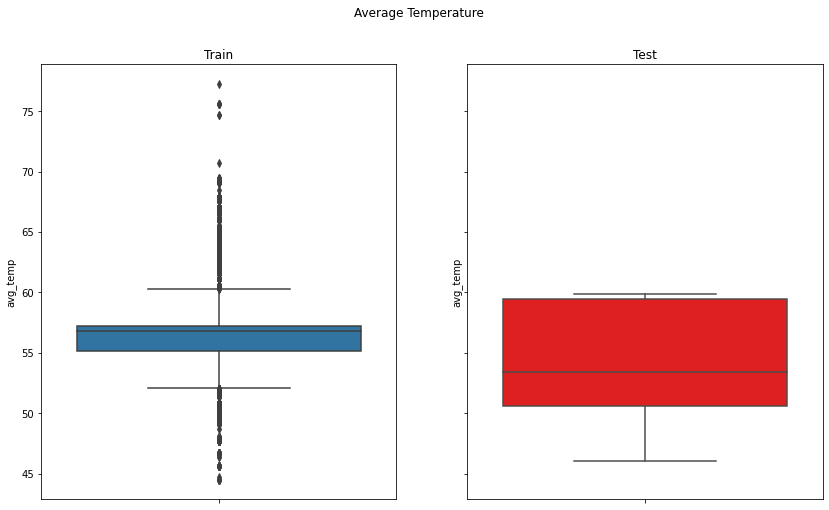

In [202]:
fig, ax = plt.subplots(1, 2, figsize=(14, 8), sharey=True)
fig.suptitle('Average Temperature')


sns.boxplot(ax=ax[0],y="avg_temp",data=train)
ax[0].set_title('Train')

sns.boxplot(ax=ax[1],y="avg_temp",data=test,color='red')
ax[1].set_title('Test')

Text(0.5, 1.0, 'Average Temperature vs site EUI')

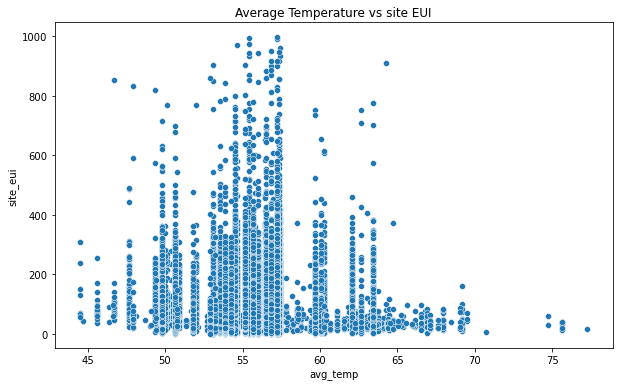

In [203]:
#scatter plot

fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=train, x="avg_temp", y="site_eui")
plt.title('Average Temperature vs site EUI')